# HOW TO FIND THE DOMINANT COLOURS IN AN IMAGE USING SCIPY AND CLUSTERING

Color clustering and scaling are essential processes in image processing and data analysis. In this code example, I will demonstrate how to cluster colors in an image and then scale them using the K-Means algorithm.

## Importing the image

In [28]:
import matplotlib.image as img
image = img.imread('nio.jpeg')
image.shape

(1152, 768, 3)

This code block will now initialize empty lists for red (r), green (g), and blue (b) color values. 

It iterates over the image's rows and pixels, extracting the red, green, and blue components of each pixel and appending them to their respective lists.

A DataFrame named pixels is created with three columns: 'red', 'green', and 'blue', using the extracted color values.

In [29]:
import pandas as pd
r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red':r,
                       'green': g,
                       'blue' : b})


pixels.head()

,red,green,blue
0,9,10,12
1,9,10,14
2,9,10,15
3,10,11,15
4,10,11,15


# Color Scaling:

After creating the DataFrame, this code block scales the color values to a range between 0 and 1. 

This scaling process is essential for normalization and comparison.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'red', 'green', and 'blue' columns
scaled_data = scaler.fit_transform(pixels[['red', 'green', 'blue']])

# Create a new DataFrame with scaled values
scaled_pixels = pd.DataFrame(scaled_data, columns=['scaled_red', 'scaled_green', 'scaled_blue'])

scaled_pixels.head()


# Color Clustering and Extraction:

After scaling the colors, the code clusters them using the K-Means algorithm. 

In the provided code, the assumption is that we want to cluster colors into 2 groups.

The cluster centers represent the dominant colors in the image. 

The code then extracts these cluster centers and scales them back to the original color range, considering the standard deviation of the original data and prints the extracted colors. 

These colors represent the dominant color clusters in the image, allowing for analysis and further processing.

In [35]:
from sklearn.cluster import KMeans

# Fit K-Means clustering to the scaled data
kmeans = KMeans(n_clusters=2)
cluster_centers = kmeans.fit(scaled_pixels[['scaled_red', 'scaled_blue', 'scaled_green']]).cluster_centers_

scaled_red = 'scaled_red'
scaled_blue = 'scaled_blue'
scaled_green = 'scaled_green'
colors = []

r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_red, scaled_green, scaled_blue = cluster_center
    colors.append((
        scaled_red * r_std / 255,
        scaled_green * g_std / 255,
        scaled_blue * b_std / 255
    ))

print(colors)


/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[(0.013371027224259133, 0.01738444658811778, 0.015985057551235082), (0.05832442277437731, 0.07794755593028334, 0.0766684422515106)]


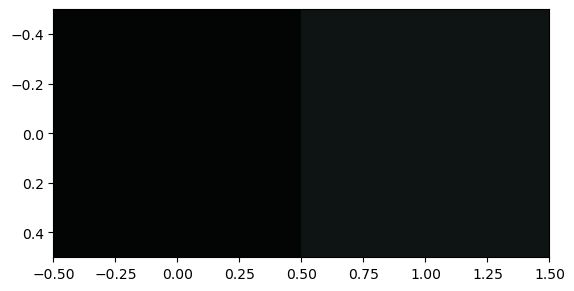

In [38]:
import matplotlib.pyplot as plt
plt.imshow([colors])
plt.savefig('colo.png')
plt.show()

The image above represents the dominant colors from the given image